# Análisis de datos y predicción de Fraude en Transacciones asociadas a Tarjetas de Crédito 

## Introducción

En este NoteBook se realiza un análisis de los datos de fraude asociados a un conjunto de 284.807 transacciones de tarjetas de crédito. Además se utiliza un modelo predictivo con el fin de detectar transacciones fraudulentas. El modelo predictivo a desarrollar se basa en una red neuronal implementada con la biblioteca Tensorflow.


Cabe desatcar que el conjunto de datos ha sido anonimizado para la confidencialidad y las características V1, ..., V28 son producto del analisis por componentes principales de una transformación de PCA. Acemás hay otras tres variables: monto, clase, tiempo. El monto indica la cantidad de dinero de la transacción, la clase denota si la transacción es fraudulenta (1) o normal (0). El tiempo es un número entero que indica el tiempo transcurrido desde la primera transacción en segundos. Todo el conjunto de datos corresponde a dos días de transacciones con tarjeta de crédito.


## Conjunto de datos

#### Contexto
Es importante que las compañías de tarjetas de crédito puedan reconocer las transacciones fraudulentas con tarjeta de crédito para que no se les cobre a los clientes por los artículos que no compraron.

#### Datos

El conjunto de datos ha analizar contiene transacciones realizadas con tarjetas de crédito en setiembre de 2013 por titulares de tarjetas europeos. Este conjunto de datos presenta las transacciones que ocurrieron en dos días, donde tenemos 492 fraudes en un total de 284.807 transacciones. El conjunto de datos es altamente desequilibrado, la clase positiva (fraudes) representa el 0.172% de todas las transacciones.

Contiene sólo variables de entrada numéricas que son el resultado de una transformación de PCA. Desafortunadamente, debido a problemas de confidencialidad, no podemos proporcionar las características originales y más información de fondo sobre los datos. Las características V1, V2, ... V28 son los componentes principales obtenidos con PCA, las únicas características que no se han transformado con PCA son (tiempo) 'Time' y (monto)'Amount'. La característica 'Time' contiene los segundos transcurridos entre cada transacción y la primera transacción en el conjunto de datos. La carácteristica 'Amount' es el monto de la transacción. Por último la característica 'Clase' es la "Clasificación" y toma el valor 1 en caso de fraude y 0 en caso contrario.

El conjunto de datos ha sido recopilado y analizado durante una colaboración de investigación de Worldline y el Machine Learning Group (http://mlg.ulb.ac.be) de la ULB (Université Libre de Bruxelles) sobre minería de datos grandes y detección de fraude. Más detalles sobre proyectos actuales y pasados ​​sobre temas relacionados están disponibles en http://mlg.ulb.ac.be/BruFence y http://mlg.ulb.ac.be/ARTML


# Referencias
Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson y Gianluca Bontempi. Calibración de la probabilidad con submuestreo para la clasificación desequilibrada. Simposio sobre Inteligencia Computacional y Minería de Datos (CIDM), IEEE, 2015.

Repositorios: https://github.com/Currie32/Predicting-Credit-Card-Fraud, https://www.kaggle.com/dalpozz/creditcardfraud/kernels, http://notmatthancock.github.io/2015/10/28/confusion-matrix.html


# Exploración de datos
El propósito de este trabajo es ddentificar transacciones fraudulentas con tarjeta de crédito.

Primero cargamos las bibliotecas requeridas y el conjunto de datos con el que vamos a trabajar.

Echemos un vistazo a la estructura del conjunto de datos y hagamos algunos análisis!



## Cargamos las librerias necesarias:

In [2]:
import pandas as pd
import numpy as np 
import tensorflow as tf
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, f1_score, classification_report
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from show_confusion_matrix import show_confusion_matrix
import math
import scipy

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'## Cargamos las librerias necesarias:


/Users/juanpablogarella/HackAcademy/code/ha_env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/juanpablogarella/HackAcademy/code/ha_env/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Cargamos el conjunto de datos

In [6]:
dataset = pd.read_csv("creditcard.csv.zip", compression='zip')


## Exploración de datos

In [7]:
# Listamos las primeras 5 transacciones:
dataset.head()

# Listamos las primeras 5 transacciones fraudulentas:
#dataset[dataset.Class == 1].head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Listamos el porcentaje de transacciones fraudulentas

In [113]:
print(str(round(dataset["Class"].mean()*100,2)) + "%")

0.17%


Las transacciones fraudulentas representan sólo el ~0.17% del total de transacciones. Esto significa que debemos detectar eventos anómalos.

In [114]:
#Diferencias entre transacciones normales y fraudulentas
print ("Fraude")
print (dataset.Amount[dataset.Class == 1].describe())
print ()
print ("Normal")
print (dataset.Amount[dataset.Class == 0].describe())

Fraude
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Normal
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


In [115]:
print("Monto total asociado a transacciones de tipo fraude: " + str(round(dataset.Amount[dataset.Class == 1].sum(),1)))
print("Monto promedio por transacción de tipo fraude: " + str(round(dataset.Amount[dataset.Class == 1].mean(),1)))
print("Monto total asociado a transacciones de tipo normal: " + str(round(dataset.Amount[dataset.Class == 0].sum(),1)))
print("Monto promedio por transacción de tipo normal: " + str(round(dataset.Amount[dataset.Class == 0].mean(),1)))



Monto total asociado a transacciones de tipo fraude: 60128.0
Monto promedio por transacción de tipo fraude: 122.2
Monto total asociado a transacciones de tipo normal: 25102462.0
Monto promedio por transacción de tipo normal: 88.3


## Análisis por Monto 

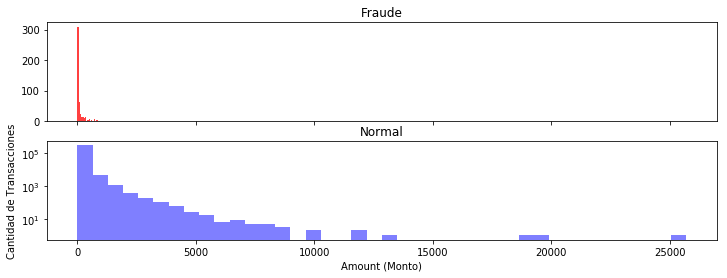

In [116]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 40

ax1.hist(dataset.Amount[dataset.Class == 1], bins = bins, alpha = 0.75, color = 'red')
ax1.set_title('Fraude')

ax2.hist(dataset.Amount[dataset.Class == 0], bins = bins, alpha = 0.5, color = 'blue')
ax2.set_title('Normal')

plt.xlabel('Amount (Monto)')
plt.ylabel('Cantidad de Transacciones')
plt.yscale('log')
plt.show()

Es interesante notar que mientras las transacciones fraudulentas conforman una pequeña porción del conjunto de datos, tienen en promedio un mayor monto por transacción. Por lo tanto esta caracteristica (Amount) puede ser útil para ser utilizada por el modelo de predicción basado en Inteligencia Artificial.

## Análisis por Tiempo

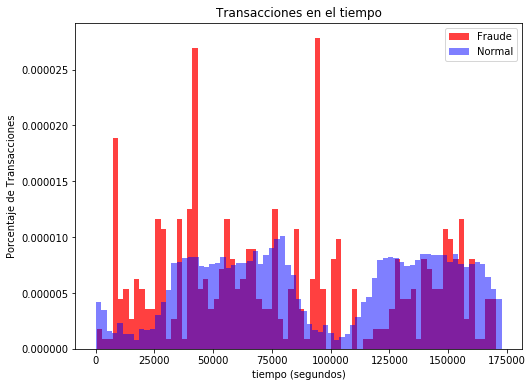

In [117]:
bins = 75
plt.hist(dataset.Time[dataset.Class == 1], bins = bins, density = True, alpha = 0.75, label = 'Fraude', color = 'red')
plt.hist(dataset.Time[dataset.Class == 0], bins = bins, density = True, alpha = 0.5, label = 'Normal', color = 'blue')
plt.legend(loc='upper right')
plt.xlabel('tiempo (segundos)')
plt.ylabel('Porcentaje de Transacciones')
plt.title('Transacciones en el tiempo')
plt.show()

Este histograma muestra el porcentaje de transacciones realizadas durante el período de tiempo. Vemos que una mayor actividad fraudulenta generalmente ocurre cuando hay un tiempo de inactividad en las transacciones generales. Si suponemos que los datos se recopilan desde el día 0 12:01 a.m. hasta el día 2 a las 11:59 p.m., ya que se describe que se recopilaron durante "dos días", vemos que la actividad fraudulenta se produce a primera hora de la mañana. 

Echemos un vistazo a las características V1, ..., V28.

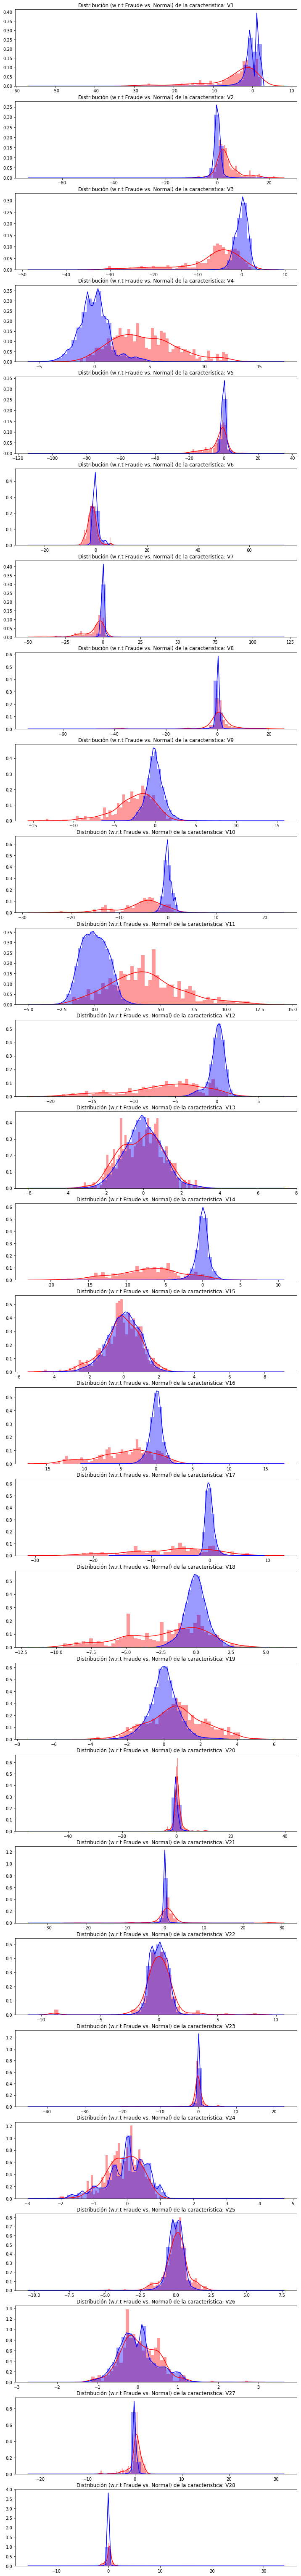

In [118]:
import matplotlib.gridspec as gridspec
import seaborn as sns
Vfeatures = dataset.iloc[:,1:29].columns
#print(Vfeatures)
bins = 50
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, V in enumerate(dataset[Vfeatures]):
    ax = plt.subplot(gs[i])
    sns.distplot(dataset[V][dataset.Class == 1], bins = bins, norm_hist = True, color = 'red')
    sns.distplot(dataset[V][dataset.Class == 0], bins = bins, norm_hist = True, color = 'blue')
    ax.set_xlabel('')
    ax.set_title('Distribución (w.r.t Fraude vs. Normal) de la caracteristica: ' + str(V))
plt.show()

Este conjunto de distribuciones muestra las diferencias entre las distribuciones de transacciones fraudulentas y no fraudulentas asociadas a cada uno de las caracteristias: V1, V2, .., V28.
Ahora desarrollemos una red neuronal utilizando tensorflow capáz de predecir si una transacción es fraudulenta o normal.

Se utilizarán todas las caracteríticas V1,V2,..,V28 y la caracteritica Amount (Monto) para el modelo.

In [119]:
#En caso de querer quitar el tiempo de nuestras caractericticas descomentar las siguiente linea:
dataset = dataset.drop(['Time'], axis =1)

In [120]:
# Create a new feature for normal (non-fraudulent) transactions.
dataset.loc[dataset.Class == 0, 'Normal'] = 1
dataset.loc[dataset.Class == 1, 'Normal'] = 0

In [121]:
# Rename 'Class' to 'Fraud'.
dataset = dataset.rename(columns={'Class': 'Fraud'})

In [122]:
# 492 fraudulent transactions, 284,315 normal transactions.
# 0.172% of transactions were fraud. 
print(dataset.Normal.value_counts())
print()
print(dataset.Fraud.value_counts())

1.0    284315
0.0       492
Name: Normal, dtype: int64

0    284315
1       492
Name: Fraud, dtype: int64


In [123]:
pd.set_option("display.max_columns",101)
dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud,Normal
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,1.0


In [124]:
# Create dataframes of only Fraud and Normal transactions.
Fraud = dataset[dataset.Fraud == 1]
Normal = dataset[dataset.Normal == 1]

In [125]:
# Set X_train equal to 80% of the fraudulent transactions.
X_train = Fraud.sample(frac=0.8)
count_Frauds = len(X_train)

# Add 80% of the normal transactions to X_train.
X_train = pd.concat([X_train, Normal.sample(frac = 0.8)], axis = 0)

# X_test contains all the transaction not in X_train.
X_test = dataset.loc[~dataset.index.isin(X_train.index)]

In [126]:
# Shuffle the dataframes so that the training is done in a random order.
X_train = shuffle(X_train)
X_test = shuffle(X_test)

In [127]:
# Add our target features to y_train and y_test.
y_train = X_train.Fraud
y_train = pd.concat([y_train, X_train.Normal], axis=1)

y_test = X_test.Fraud
y_test = pd.concat([y_test, X_test.Normal], axis=1)

In [128]:
# Drop target features from X_train and X_test.
X_train = X_train.drop(['Fraud','Normal'], axis = 1)
X_test = X_test.drop(['Fraud','Normal'], axis = 1)

In [129]:
# Check to ensure all of the training/testing dataframes are of the correct length
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

227846
227846
56961
56961


In [130]:
'''Debido al desequilibrio en los datos, la siguiente relación actuará como un sistema de ponderación para nuestro modelo.
En pocas palabras: # de fraude * ratio = # de normalidad
'''
ratio = len(X_train)/count_Frauds 

y_train.Fraud *= ratio
y_test.Fraud *= ratio

In [131]:
# Names of all of the features in X_train.
features = X_train.columns.values
print(features)
# Transform each feature in features so that it has a mean of 0 and standard deviation of 1; 
# this helps with training the neural network.
for feature in features:
    mean, std = dataset[feature].mean(), dataset[feature].std()
    X_train.loc[:, feature] = (X_train[feature] - mean) / std
    X_test.loc[:, feature] = (X_test[feature] - mean) / std

['V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8' 'V9' 'V10' 'V11' 'V12' 'V13'
 'V14' 'V15' 'V16' 'V17' 'V18' 'V19' 'V20' 'V21' 'V22' 'V23' 'V24' 'V25'
 'V26' 'V27' 'V28' 'Amount']


## Train the Neural Net

In [141]:
# Split the testing data into validation and testing sets
split = int(len(y_test)/2)

inputX = X_train.values
inputY = y_train.values
inputX_valid = X_test.values[:split]
inputY_valid = y_test.values[:split]
inputX_test = X_test.values[split:]
inputY_test = y_test.values[split:]

print("inputX: " + str(inputX.shape))
print("inputY: " + str(inputY.shape))
print("inputX_valid: " + str(inputX_valid.shape))
print("inputY_valid: " + str(inputY_valid.shape))
print("inputX_test: " + str(inputX_test.shape))
print("inputY_test: " + str(inputY_test.shape))

inputX: (227846, 29)
inputY: (227846, 2)
inputX_valid: (28480, 29)
inputY_valid: (28480, 2)
inputX_test: (28481, 29)
inputY_test: (28481, 2)


In [133]:
# Number of input nodes.
input_nodes = inputX.shape[1]

# Multiplier maintains a fixed ratio of nodes between each layer.
mulitplier = 1.5 

# Number of nodes in each hidden layer
hidden_nodes1 = 18
hidden_nodes2 = round(hidden_nodes1 * mulitplier)
hidden_nodes3 = round(hidden_nodes2 * mulitplier)

# Percent of nodes to keep during dropout.
pkeep = tf.placeholder(tf.float32)

In [134]:
# input
x = tf.placeholder(tf.float32, [None, input_nodes])

# layer 1
W1 = tf.Variable(tf.truncated_normal([input_nodes, hidden_nodes1], stddev = 0.15))
b1 = tf.Variable(tf.zeros([hidden_nodes1]))
y1 = tf.nn.sigmoid(tf.matmul(x, W1) + b1)

# layer 2
W2 = tf.Variable(tf.truncated_normal([hidden_nodes1, hidden_nodes2], stddev = 0.15))
b2 = tf.Variable(tf.zeros([hidden_nodes2]))
y2 = tf.nn.sigmoid(tf.matmul(y1, W2) + b2)

# layer 3
W3 = tf.Variable(tf.truncated_normal([hidden_nodes2, hidden_nodes3], stddev = 0.15)) 
b3 = tf.Variable(tf.zeros([hidden_nodes3]))
y3 = tf.nn.sigmoid(tf.matmul(y2, W3) + b3)
y3 = tf.nn.dropout(y3, pkeep)

# layer 4
W4 = tf.Variable(tf.truncated_normal([hidden_nodes3, 2], stddev = 0.15)) 
b4 = tf.Variable(tf.zeros([2]))
y4 = tf.nn.softmax(tf.matmul(y3, W4) + b4)

# output
y = y4
y_ = tf.placeholder(tf.float32, [None, 2])

In [135]:
# Parameters
training_epochs = 2000
training_dropout = 0.9
display_step = 10
n_samples = y_train.shape[0]
batch_size = 2048
learning_rate = 0.005

In [136]:
# Cost function: Cross Entropy
cost = -tf.reduce_sum(y_ * tf.log(y))

# We will optimize our model via AdamOptimizer
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

# Correct prediction if the most likely value (Fraud or Normal) from softmax equals the target value.
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [ ]:
accuracy_summary = [] # Record accuracy values for plot
cost_summary = [] # Record cost values for plot
valid_accuracy_summary = [] 
valid_cost_summary = [] 
stop_early = 0 # To keep track of the number of epochs before early stopping

# Save the best weights so that they can be used to make the final predictions
#checkpoint="/Users/juanpablogarella/Dropbox/CursoAI/finanzas/credit-card-fraud-detection-NN/best_model.ckpt"
checkpoint="./best_model.ckpt"
#"/Users/Dave/Desktop/Programming/Personal Projects/CreditCardFraud_Kaggle/best_model.ckpt"

saver = tf.train.Saver(max_to_keep=1)

# Initialize variables and tensorflow session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_epochs): 
        for batch in range(int(n_samples/batch_size)):
            batch_x = inputX[batch*batch_size : (1+batch)*batch_size]
            batch_y = inputY[batch*batch_size : (1+batch)*batch_size]

            sess.run([optimizer], feed_dict={x: batch_x, 
                                             y_: batch_y,
                                             pkeep: training_dropout})

        # Display logs after every 10 epochs
        if (epoch) % display_step == 0:
            train_accuracy, newCost = sess.run([accuracy, cost], feed_dict={x: inputX, 
                                                                            y_: inputY,
                                                                            pkeep: training_dropout})

            valid_accuracy, valid_newCost = sess.run([accuracy, cost], feed_dict={x: inputX_valid, 
                                                                                  y_: inputY_valid,
                                                                                  pkeep: 1})

            print ("Epoch:", epoch,
                   "Acc =", "{:.5f}".format(train_accuracy), 
                   "Cost =", "{:.5f}".format(newCost),
                   "Valid_Acc =", "{:.5f}".format(valid_accuracy), 
                   "Valid_Cost = ", "{:.5f}".format(valid_newCost))
            
            # Save the weights if these conditions are met.
            if epoch > 0 and valid_accuracy > max(valid_accuracy_summary): # and valid_accuracy > 0.999:
                saver.save(sess, checkpoint)
                print("Model saved in file: %s" % checkpoint)
            
            # Record the results of the model
            accuracy_summary.append(train_accuracy)
            cost_summary.append(newCost)
            valid_accuracy_summary.append(valid_accuracy)
            valid_cost_summary.append(valid_newCost)
            
            # If the model does not improve after 15 logs, stop the training.
            if valid_accuracy < max(valid_accuracy_summary) and epoch > 100:
                stop_early += 1
                if stop_early == 50:
                    break
            else:
                stop_early = 0
            
    print()
    print("Optimization Finished!")
    print()

with tf.Session() as sess:
    # Load the best weights and show its results
    saver.restore(sess, checkpoint)
    training_accuracy = sess.run(accuracy, feed_dict={x: inputX, y_: inputY, pkeep: training_dropout})
    validation_accuracy = sess.run(accuracy, feed_dict={x: inputX_valid, y_: inputY_valid, pkeep: 1})
    
    print("Results using the best Valid_Acc:")
    print()
    print("Training Accuracy =", training_accuracy)
    print("Validation Accuracy =", validation_accuracy)

Epoch: 0 Acc = 0.95955 Cost = 71491.42969 Valid_Acc = 0.95751 Valid_Cost =  10685.74414
Epoch: 10 Acc = 0.97930 Cost = 48600.08984 Valid_Acc = 0.97802 Valid_Cost =  10117.50684
Model saved in file: ./best_model.ckpt
Epoch: 20 Acc = 0.98807 Cost = 36954.42578 Valid_Acc = 0.98711 Valid_Cost =  14547.18555
Model saved in file: ./best_model.ckpt
Epoch: 30 Acc = 0.99398 Cost = 24989.16797 Valid_Acc = 0.99336 Valid_Cost =  17575.14648
Model saved in file: ./best_model.ckpt
Epoch: 40 Acc = 0.99663 Cost = 21050.38086 Valid_Acc = 0.99638 Valid_Cost =  19371.83789
Model saved in file: ./best_model.ckpt
Epoch: 50 Acc = 0.99673 Cost = 9241.20410 Valid_Acc = 0.99673 Valid_Cost =  27688.96680
Model saved in file: ./best_model.ckpt
Epoch: 60 Acc = 0.99721 Cost = 6971.53516 Valid_Acc = 0.99691 Valid_Cost =  35271.63281
Model saved in file: ./best_model.ckpt
Epoch: 70 Acc = 0.99674 Cost = 4733.91602 Valid_Acc = 0.99645 Valid_Cost =  40358.92969
Epoch: 80 Acc = 0.99796 Cost = 2874.44409 Valid_Acc = 0.99

In [ ]:

# Plot the accuracy and cost summaries 
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(11,4))

ax1.plot(accuracy_summary,'b', label="Train") # blue
ax1.plot(valid_accuracy_summary,'r', label="Validation") # green
ax1.set_title('Accuracy')

ax2.plot(cost_summary,'b', label="Train")
ax2.plot(valid_cost_summary,'r',label="Validation")
ax2.set_title('Cost')

plt.xlabel('Epochs (x10)')
plt.legend()

plt.show()# Find the predicted values, then use them to build a confusion matrix

predicted = tf.argmax(y, 1)
with tf.Session() as sess:  
    # Load the best weights
    saver.restore(sess, checkpoint)
    testing_predictions, testing_accuracy = sess.run([predicted, accuracy], 
                                                     feed_dict={x: inputX_test, y_:inputY_test, pkeep: 1})
    
    print("F1-Score =", f1_score(inputY_test[:,1], testing_predictions))
    print("Testing Accuracy =", testing_accuracy)
    print()
    c = confusion_matrix(inputY_test[:,1], testing_predictions)
    show_confusion_matrix(c, ['Fraude', 'Normal'])

Aunque la red neuronal puede detectar la mayoría de las transacciones fraudulentas, todavía hay algunas que escaparon. Por otro lado hay algunas de las transacciones normales que se clasificaron como fraudulentas, lo que lamentablemente puede sumar muy rápidamente dado el gran número de transacciones de tarjetas de crédito que ocurren cada minuto. No obstante, estos modelos funcionan razonablemente bien y espero que si tuviéramos más datos, y si las características no se hubieran pretransformado, pudiéramos haber creado nuevas características y construido una red neuronal más útil.

## Imprima el valor de la Precisión:

Recuerde que

\begin{align}
Precisión =  \frac{True Positive}{True Positive + False Positive}
\end{align}


In [ ]:
#------------------------

 #Escriba aquí su código

#------------------------


## Imprima el valor del Recall:

Recuerde que

\begin{align}
Recall =  \frac{True Positive}{True Positive + False Negative}
\end{align}



In [ ]:
#------------------------

 #Escriba aquí su código

#------------------------